<a href="https://colab.research.google.com/github/dmejiaho/Se-ales-y-sistemas-Python/blob/main/Daniel_Mejia_SerieFourierEj_Trigo_Compacta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Ejercicios Serie Fourier - Daniel Mauricio Mejia Hoyos

1. Presente una simulación relacionada con la proyección lineal de $\mathbf{a}\in\mathbb{R}^2$ sobre $\mathbf{b}\in\mathbb{R}^2$. El código debe permitir al usuario ingresar las componentes de los dos vectores, calcular el factor de escala de la proyección y graficar los vectores de entrada y el proyectado (usar la función [pyplot.arrow](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.arrow.html)).



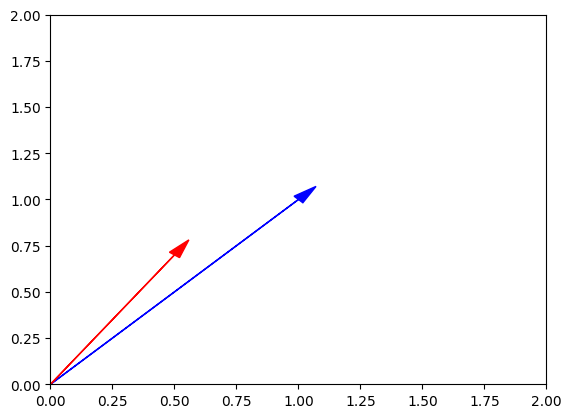

In [18]:
import matplotlib.pyplot as plt  # Importa la biblioteca matplotlib para la creacion de graficos

# Define el punto de inicio (x, y)
x_inicio = 0
y_inicio = 0

# Define el punto final (x, y) para la primera flecha
x_final = 1
y_final = 1

# Dibuja la primera flecha azul desde (x_inicio, y_inicio) hasta (x_final, y_final)
plt.arrow(x_inicio, y_inicio, x_final - x_inicio, y_final - y_inicio, head_width=0.05, head_length=0.1, color='blue')

# Dibuja la segunda flecha roja desde (x_inicio, y_inicio) hacia un punto (0.5, 0.7) relativo al punto final original
plt.arrow(x_inicio, y_inicio, x_final - 0.5, y_final - 0.3, head_width=0.05, head_length=0.1, color='red')

# Establece los limites del grafico para que los ejes X e Y vayan de 0 a 2
plt.xlim(0, 2)
plt.ylim(0, 2)

# Muestra el grafico con las flechas
plt.show()


In [19]:
x_a=float(input("Ingrese  x del vector a: "))
y_a=float(input("Ingrese  y del vector a: "))

x_b=float(input("Ingrese x del vector b: "))
y_b=float(input("Ingrese y del vector b: "))

Ingrese  x del vector a: 3
Ingrese  y del vector a: 2
Ingrese x del vector b: 4
Ingrese y del vector b: 4


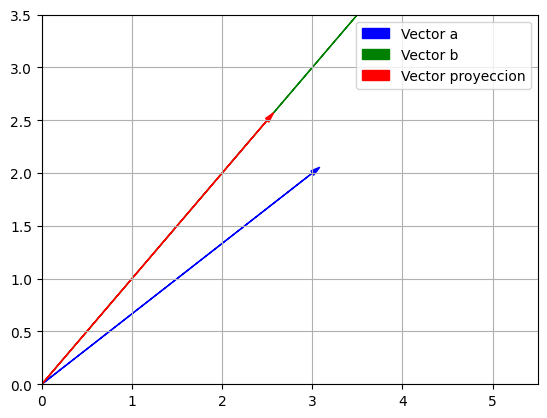

In [20]:
import numpy as np  # Importa la biblioteca numpy

# Definir los vectores a y b
a = np.array([x_a, y_a])  # Vector a en R^2
b = np.array([x_b, y_b])  # Vector b en R^2

# Calcular el producto escalar entre a y b
dot_product = np.dot(a, b)

# Calcular la norma al cuadrado de b
norm_squared = np.linalg.norm(b) ** 2

# Calcular la proyeccion de a sobre b
proyeccion = (dot_product / norm_squared) * b

# Dibujar el vector a en azul
v_a = plt.arrow(0, 0, a[0], a[1], head_width=0.05, head_length=0.1, color='blue')

# Dibujar el vector b en verde
v_b = plt.arrow(0, 0, b[0], b[1], head_width=0.05, head_length=0.1, color='green')

# Dibujar la proyeccion de a sobre b en rojo
v_p = plt.arrow(0, 0, proyeccion[0], proyeccion[1], head_width=0.05, head_length=0.1, color='red')

# Establece los limites del grafico
plt.xlim(0, 5.5)
plt.ylim(0, 3.5)

# Agregar las leyendas para los vectores
plt.legend([v_a, v_b, v_p], ['Vector a', 'Vector b', 'Vector proyeccion'])

# Muestra el grafico con las flechas y la grilla
plt.grid()
plt.show()


2. Encontrar la representación por serie exponencial de Fourier de la señal $x(t) = A {\rm{rect}}_{\tau/2}(t)$, con $t\in [-\tau/2,\tau/2]$. Graficar el espectro, la fase del espectro, la reconstrucción para $n\in\{0,\pm1,\pm2,\dots\}$, y determinar el valor del error relativo para cada valor de $n$. Utilice el ambiente animación de Python para mostrar los resultados.

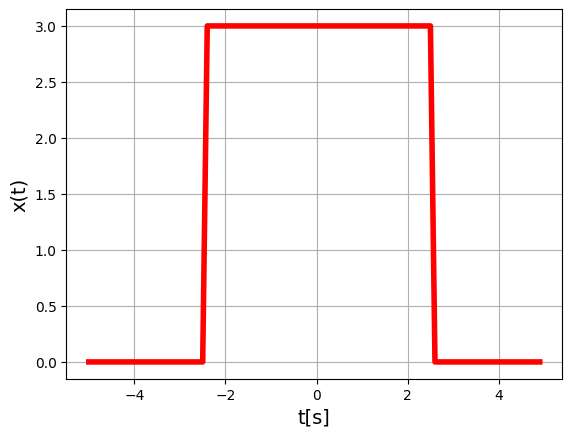

In [21]:
A = 3 # amplitud de la señal
T = 10 # segundos de gráfica
Fo = 1/T
Fs = 100*Fo # frecuencia de muestreo definida
tv = np.arange(-T/2,T/2,1/Fs) #vector de tiempo generado
Nm = len(tv) #numero de muestras requeridas

#
xo = np.zeros(Nm)
xo[(tv>=-T/4)&(tv<=T/4)] = A
#graficar señal original
plt.plot(tv,xo,'r',linewidth=4)
plt.grid()
plt.xlabel("t[s]",fontsize = 14)
plt.ylabel("x(t)",fontsize = 14)
plt.show()

In [22]:
N = 10 #numero armonicos
wo = 2*np.pi/T # frecuencia fundamental
# definir bases
phin = np.zeros((Nm,2*N+1),dtype=np.complex_)#crear matriz para guardar bases
for n in range(-N,N+1,1):
    phin[:,n+N] = np.exp(1j*n*wo*tv)#base de fourier en el intervalo de interés

In [23]:
# graficar bases
from ipywidgets import interact,IntSlider
fig, ax = plt.subplots(1, 1,figsize=(6,3))
def pltbase(n=1):

    plt.plot(tv,np.real(phin[:,int(n+N)]),label="Re{$\phi_n$(t)}")
    plt.xlabel("t[s]",fontsize = 14)
    plt.ylabel("$\phi_n$(t)",fontsize = 14)
    plt.plot(tv,np.imag(phin[:,int(n+N)]),label="Im{$\phi_n$(t)}")
    plt.grid()
    plt.plot(tv,xo,'r',linewidth=4,label='$x(t)$')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.gcf().set_figwidth(6)
    plt.gcf().set_figheight(3)
    plt.show()
    return
interact(pltbase,n=(-N,N,1))

interactive(children=(IntSlider(value=1, description='n', max=10, min=-10), Output()), _dom_classes=('widget-i…

<function __main__.pltbase(n=1)>

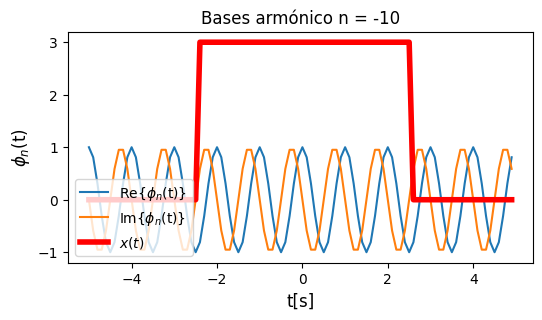

In [24]:
from matplotlib import animation, rc
from IPython.display import HTML

#figura y axes animaciónx
fig, ax = plt.subplots(1, 1,figsize=(6,3))
#función para gráfico interactivo
def update(n):
    #actualización regresor Bayesiano
    #Graficar prior
    ax.clear()
    ax.plot(tv,np.real(phin[:,int(n+N)]),label="Re{$\phi_n$(t)}")
    ax.set_xlabel("t[s]",fontsize = 12)
    ax.set_ylabel("$\phi_n$(t)",fontsize = 12)
    ax.plot(tv,np.imag(phin[:,int(n+N)]),label="Im{$\phi_n$(t)}")
    ax.plot(tv,xo,'r',linewidth=4,label='$x(t)$')
    ax.set_title(f'Bases armónico n = {n}')
    ax.legend(loc='lower left')
    plt.show()
    #desplegar animación
anim = animation.FuncAnimation(fig, update, frames=np.arange(-N,N,1), blit=False)
rc('animation', html='jshtml')
anim

<ipython-input-25-91847bc4f030>:4: RuntimeWarning: invalid value encountered in divide
  Cn = A*np.sin(0.5*nv*np.pi)/(nv*np.pi)


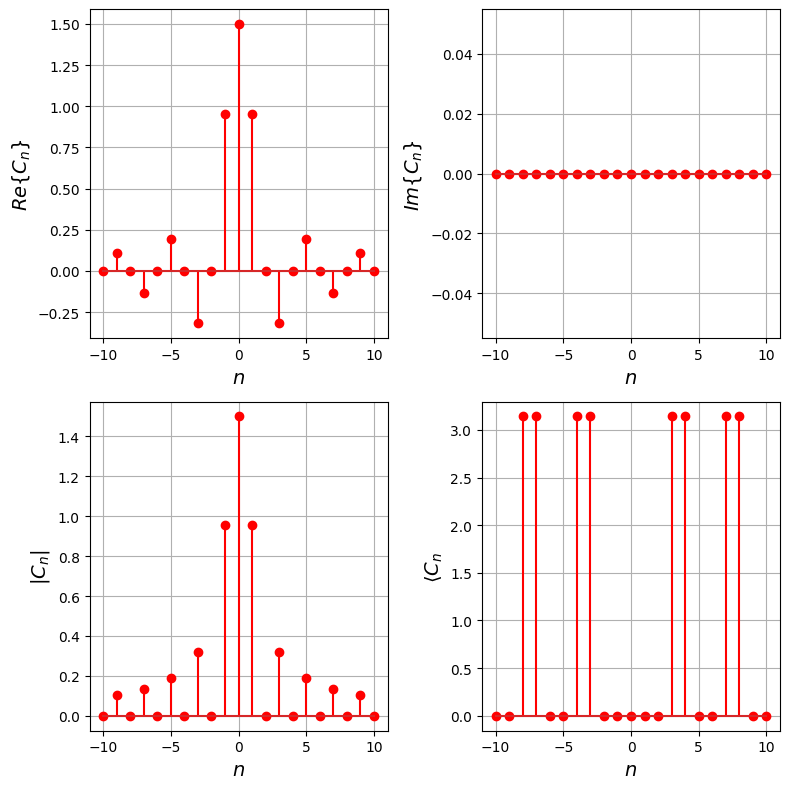

In [25]:
#calcular espectro -> cambiar según la señal estudiada
cn = np.zeros(2*N+1,dtype=np.complex_)
nv = np.linspace(-N, N, 2*N+1) #vector num armónicos
Cn = A*np.sin(0.5*nv*np.pi)/(nv*np.pi)
Cn[N] = 0.5*A # nivel dc C_0
#graficar espectro
fig = plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.stem(nv, np.real(Cn), 'r')
plt.xlabel(r'$n$',fontsize = 14)
plt.ylabel(r'$Re\{C_n\}$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,2)
plt.stem(nv, np.imag(Cn), 'r')
plt.xlabel(r'$n$',fontsize = 14)
plt.ylabel(r'$Im\{C_n\}$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,3)
plt.stem(nv, abs(Cn), 'r')#magnitud del espectro
plt.xlabel(r'$n$',fontsize = 14)
plt.ylabel(r'$|C_n|$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,4)
plt.stem(nv, np.angle(Cn), 'r')#fase del espectro
plt.xlabel(r'$n$',fontsize = 14)
plt.ylabel(r'$\langle C_n$',fontsize = 14)
plt.axis('tight')
plt.grid()

fig.tight_layout()

In [26]:
Px = 0.5*A**2 # estimar según señal estudiada
def pltest(Na=1):
    ind = np.arange(N-Na,N+Na+1)
    er = 1- np.sum(abs(Cn[ind])**2)/Px
    #señal reconstruida
    xe = phin[:,ind].dot(Cn[ind] ) # dot calcula el producto entre vectores
    plt.plot(tv,xe,color='b',label='$x_e(t)$') # señal estimada o filtrada
    plt.plot(tv,xo,color='r',label='x(t)') #señal original
    plt.title('$E_r$=%.2f[%%]' % (100*er),fontsize=16)
    plt.xlabel('t[s]')
    plt.ylabel('x(t)')
    plt.grid()
    plt.legend()
    plt.show()

    return
interact(pltest,Na=(1,N,1))

interactive(children=(IntSlider(value=1, description='Na', max=10, min=1), Output()), _dom_classes=('widget-in…

<function __main__.pltest(Na=1)>

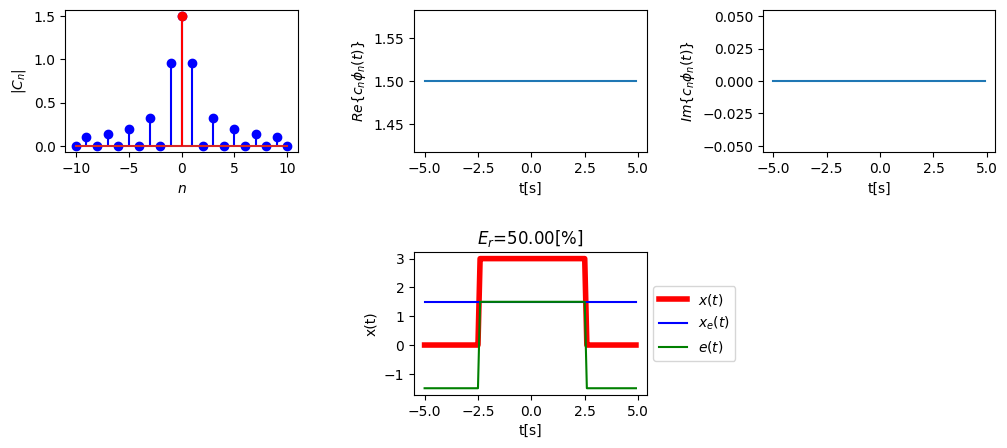

In [27]:
#figura y axes animaciónx
fig, ax = plt.subplots(2, 3,figsize=(12,5))
#función para gráfico interactivo
def update(n):
    #actualización regresor Bayesiano
    #Graficar prior
    ax[0,0].clear()
    ax[0,1].clear()
    ax[0,2].clear()
    ax[1,0].clear()
    ax[1,1].clear()
    ax[1,2].clear()

    #espectro
    ind = np.arange(N-n,N+n+1) #armónicos a considerar
    ax[0,0].stem(nv, abs(Cn), 'b')#magnitud del espectro
    ax[0,0].stem(nv[ind], abs(Cn[ind]), 'r')#magnitud del espectro
    ax[0,0].set_xlabel(r'$n$')
    ax[0,0].set_ylabel(r'$|C_n|$')

    #componentes espectrales
    ce = phin[:,ind].dot(np.diag(Cn[ind]) )
    ax[0,1].plot(tv,np.real(ce))#componente real
    ax[0,1].set_xlabel('t[s]')
    ax[0,1].set_ylabel('$Re\{c_n\phi_n(t)\}$')

    ax[0,2].plot(tv,np.imag(ce))#componente imaginario
    ax[0,2].set_xlabel('t[s]')
    ax[0,2].set_ylabel('$Im\{c_n\phi_n(t)\}$')




    #reconstruccion
    er = 1- np.sum(abs(Cn[ind])**2)/Px
    #señal reconstruida
    xe = phin[:,ind].dot(Cn[ind] ) # dot calcula el producto entre vectores
    #error en t
    et = xo - xe

    ax[1,1].plot(tv,xo,'r',linewidth=4,label='$x(t)$')
    ax[1,1].plot(tv,xe,color='b',label='$x_e(t)$') # señal estimada o filtrada
    ax[1,1].plot(tv,et,color='g',label='$e(t)$') # señal estimada o filtrada
    ax[1,1].set_title('$E_r$=%.2f[%%]' % (100*er))
    ax[1,1].set_xlabel('t[s]')
    ax[1,1].set_ylabel('x(t)')
    ax[1,1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax[1,0].axis('off')
    ax[1,2].axis('off')
    plt.subplots_adjust(wspace=0.5,hspace=0.7)
    plt.show()

#desplegar animación
anim = animation.FuncAnimation(fig, update, frames=np.arange(0,N+1,1), blit=False)
rc('animation', html='jshtml')

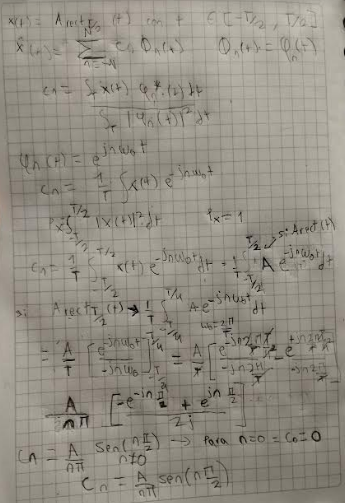